In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
file_path = 'housingdata.csv'  # 업로드한 데이터 경로
df = pd.read_csv(file_path)

# 데이터 확인
print("\n데이터 개요:")
print(df.info())

print("\n데이터 샘플:")
print(df.head())


데이터 개요:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

데이터 샘플:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4

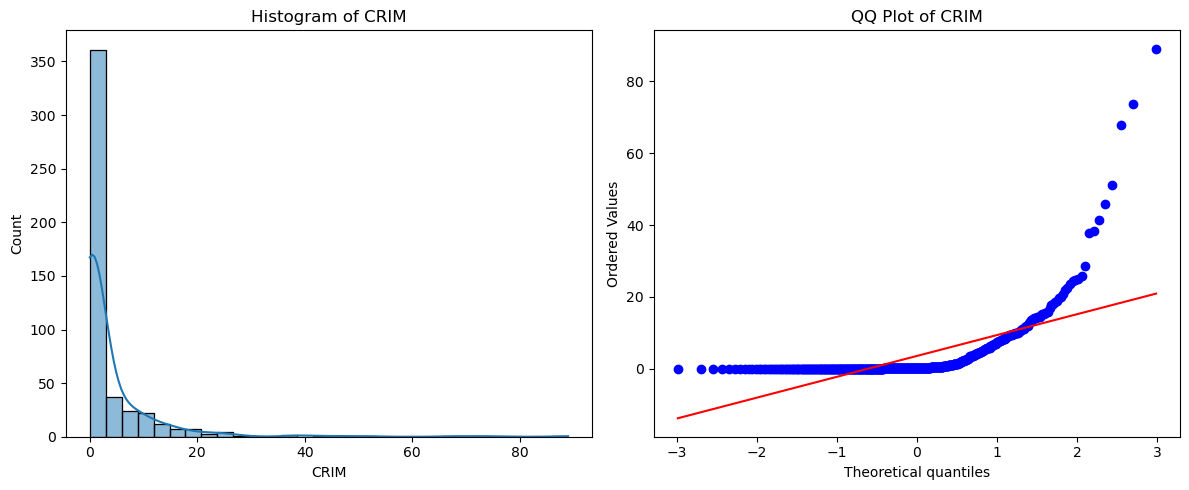

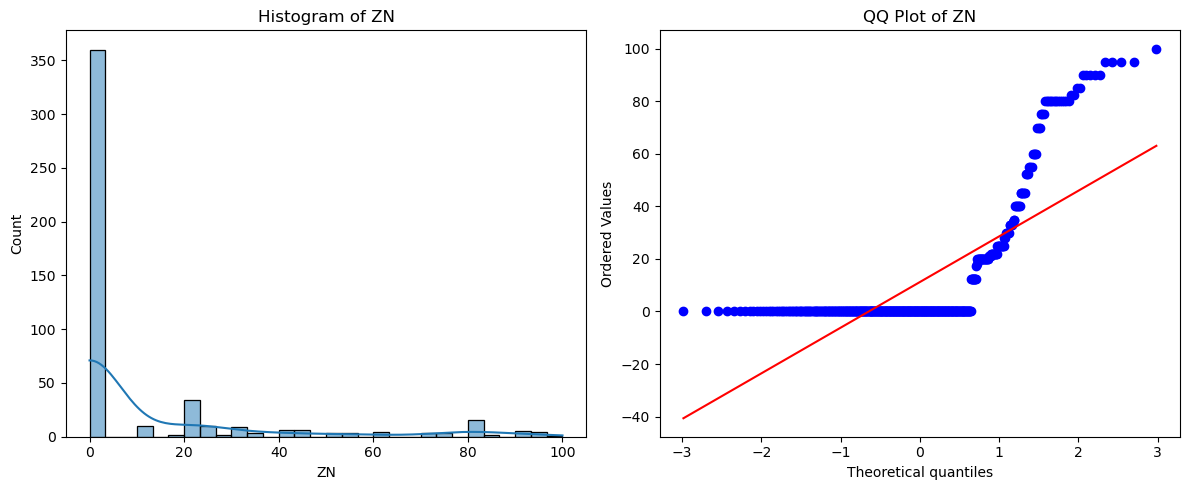

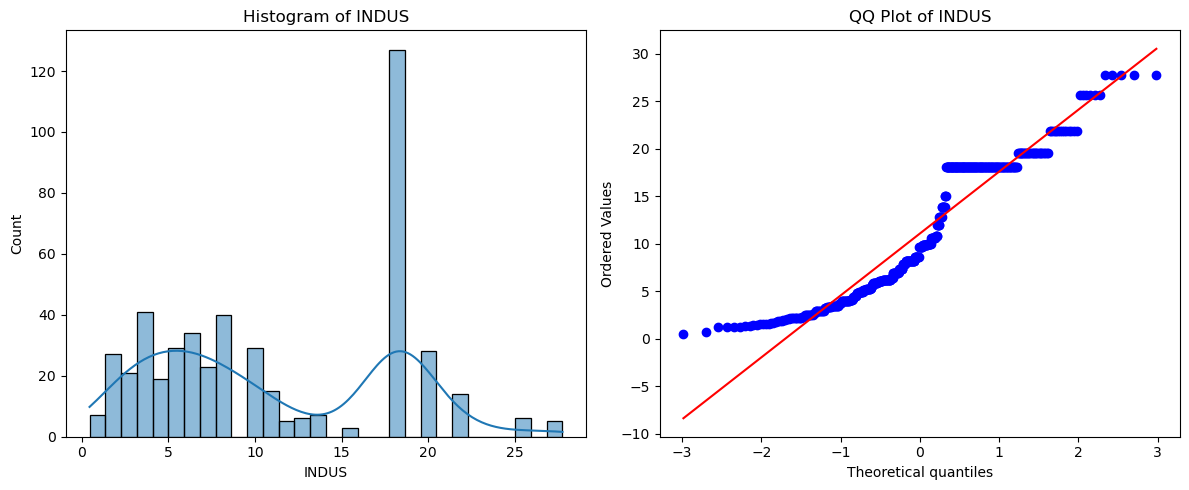

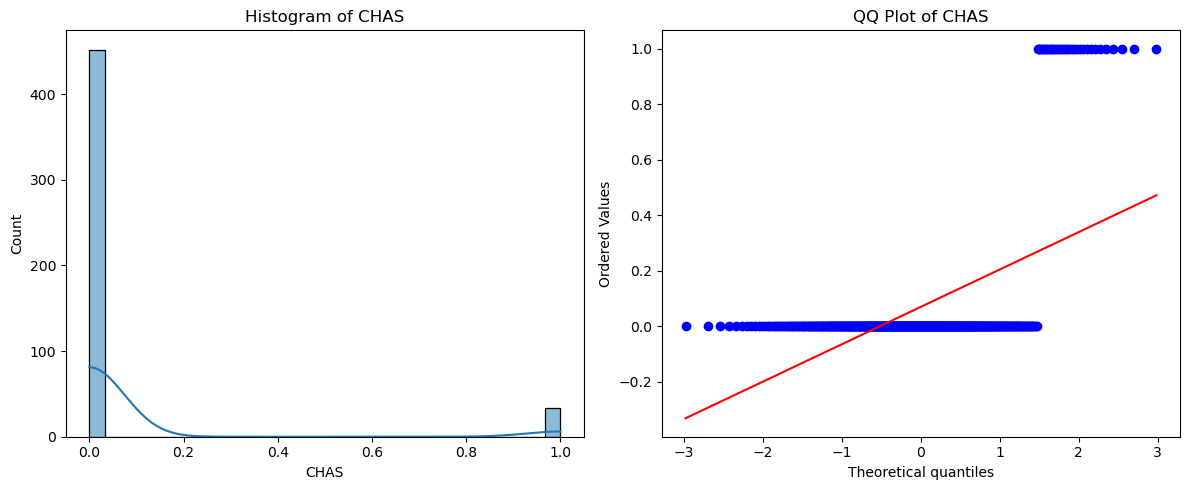

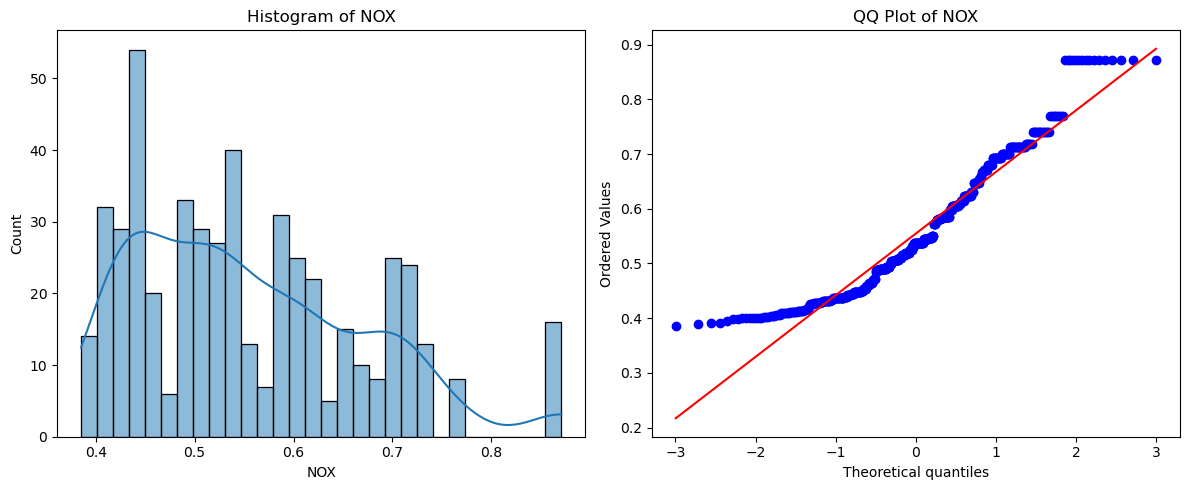

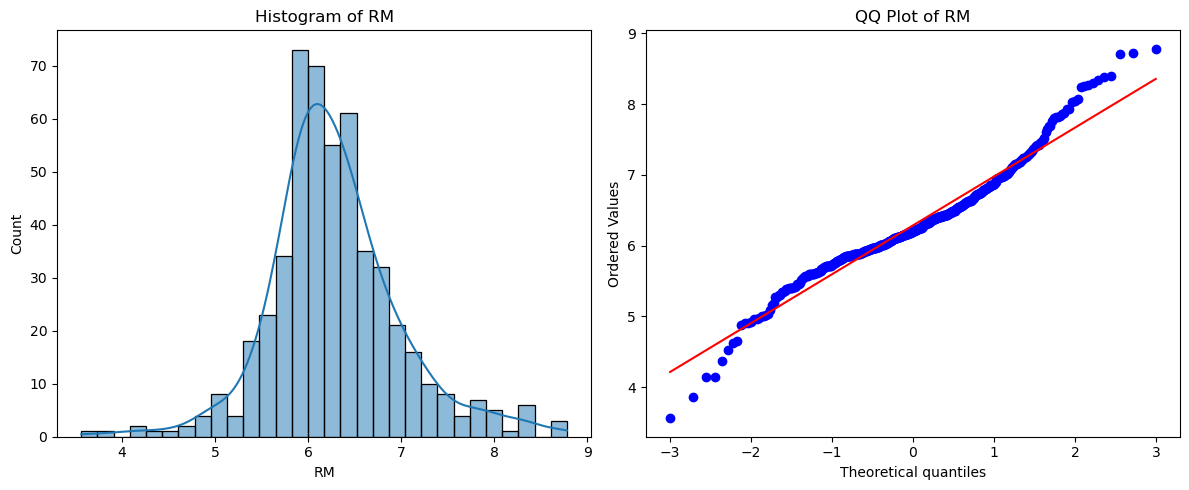

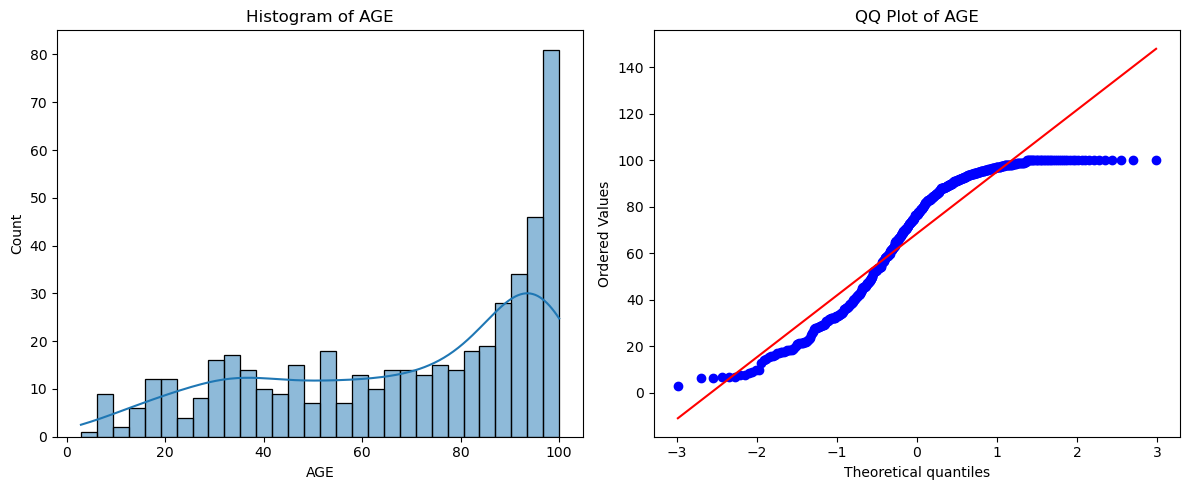

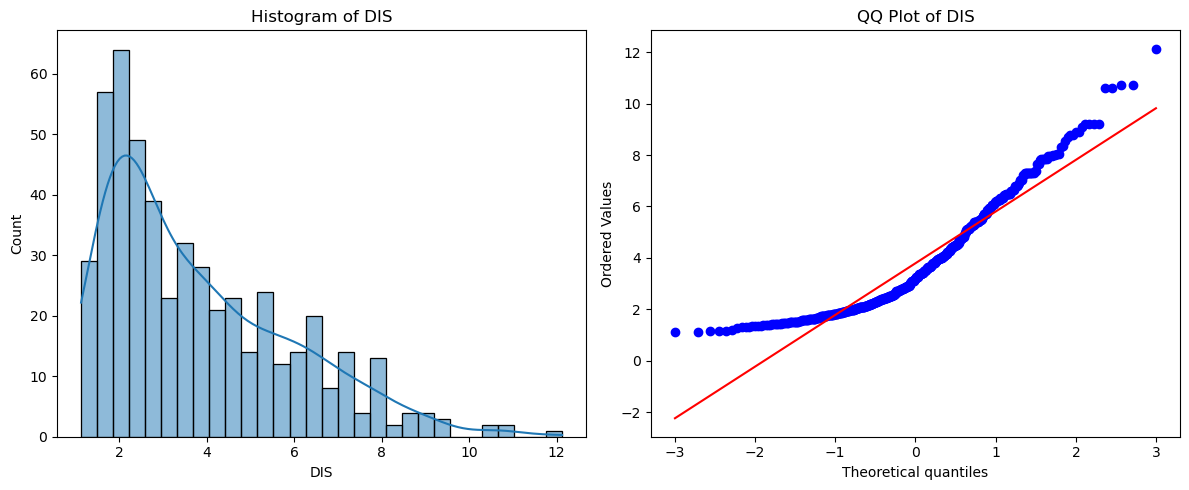

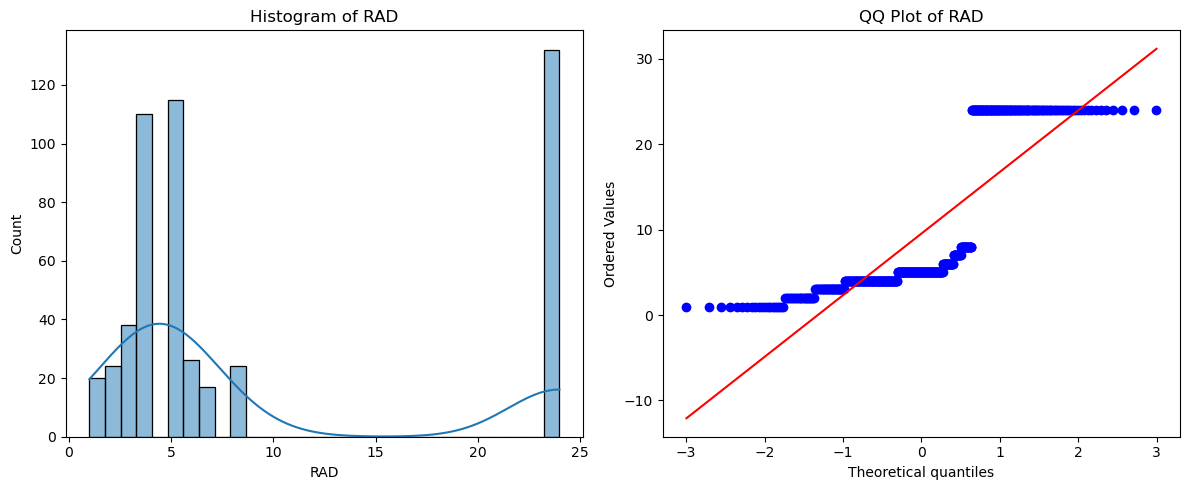

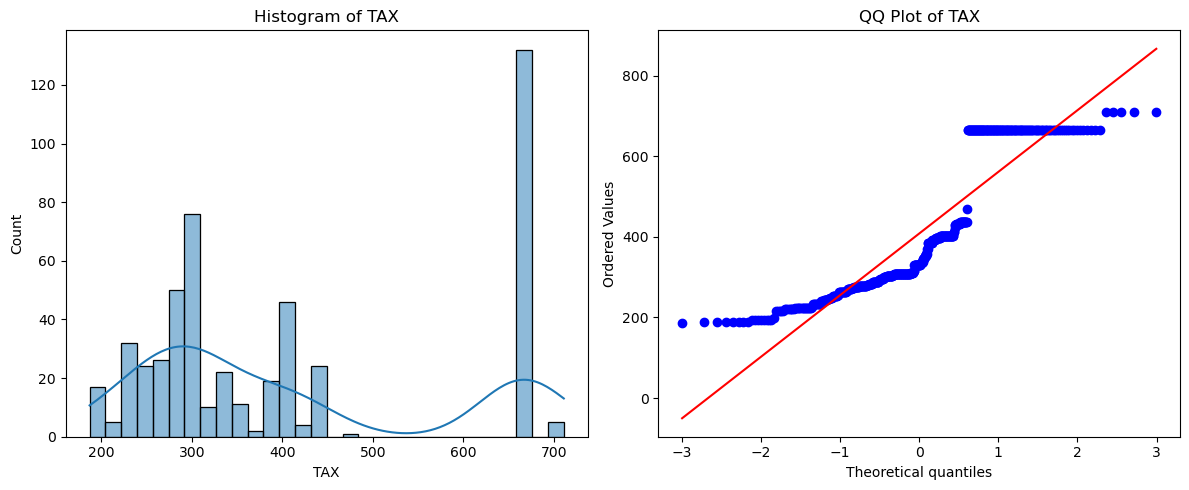

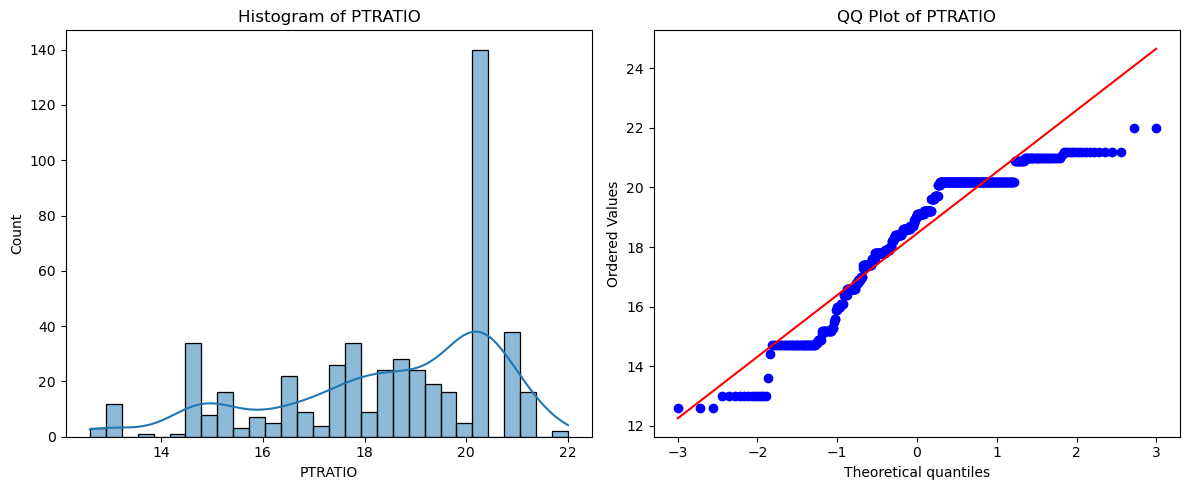

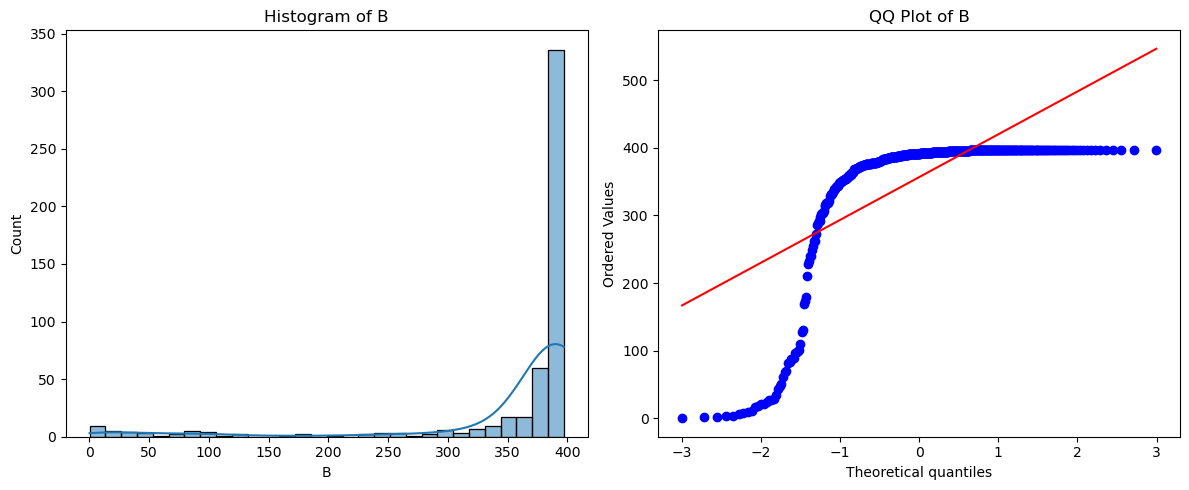

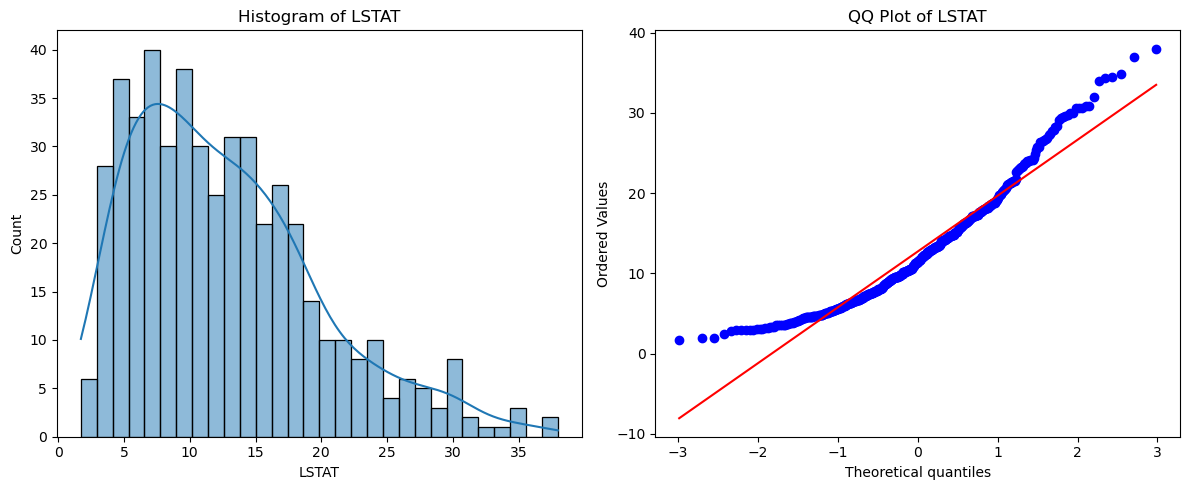

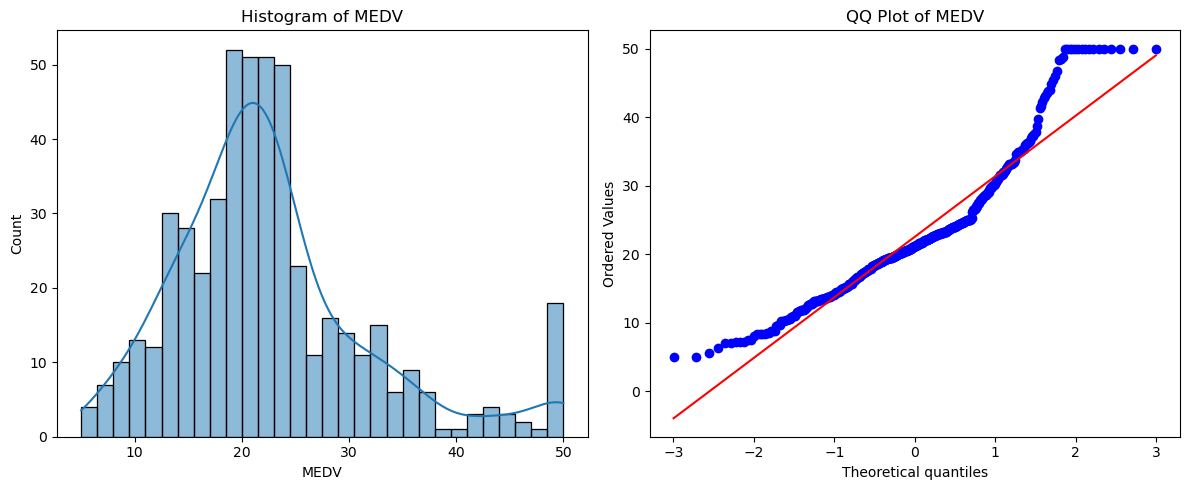


정규성 검사 결과:
             Stat P-Value Normal Distribution
CRIM     0.444597     0.0               False
ZN        0.54748     0.0               False
INDUS     0.90007     0.0               False
CHAS     0.276682     0.0               False
NOX      0.935636     0.0               False
RM       0.960872     0.0               False
AGE      0.894598     0.0               False
DIS      0.903234     0.0               False
RAD      0.679643     0.0               False
TAX      0.815238     0.0               False
PTRATIO  0.903597     0.0               False
B        0.476823     0.0               False
LSTAT    0.937279     0.0               False
MEDV     0.917176     0.0               False

결측치 처리 후:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


/var/folders/20/38t9rp3145lbpycm0mc5nxb80000gn/T/ipykernel_8331/363333770.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)
/var/folders/20/38t9rp3145lbpycm0mc5nxb80000gn/T/ipykernel_8331/363333770.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [2]:
from scipy.stats import shapiro, probplot

# 수치형 변수 추출
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 정규성 검사 및 시각화
def check_normality_and_plot(data, columns):
    normality_results = {}
    for col in columns:
        # Shapiro-Wilk Test for Normality
        stat, p_value = shapiro(data[col].dropna())
        normality_results[col] = {
            "Stat": stat,
            "P-Value": p_value,
            "Normal Distribution": p_value > 0.05  # P > 0.05: 정규 분포 가정
        }

        # 시각화: 히스토그램과 QQ 플롯
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(data[col].dropna(), kde=True, bins=30)
        plt.title(f'Histogram of {col}')

        plt.subplot(1, 2, 2)
        probplot(data[col].dropna(), dist="norm", plot=plt)
        plt.title(f'QQ Plot of {col}')
        plt.tight_layout()
        plt.show()
    
    return pd.DataFrame(normality_results).T

# 정규성 검사 결과
normality_summary = check_normality_and_plot(df, numeric_columns)

print("\n정규성 검사 결과:")
print(normality_summary)

# 결측치 처리
def handle_missing_values(df, normality_info):
    for column in df.columns:
        if column == 'CHAS':
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
        elif column in normality_info.index:
            if normality_info.loc[column, "Normal Distribution"]:
                mean_value = df[column].mean()
                df[column].fillna(mean_value, inplace=True)
            else:
                median_value = df[column].median()
                df[column].fillna(median_value, inplace=True)
    return df

df_cleaned = handle_missing_values(df, normality_summary)

# 결측치 처리 확인
print("\n결측치 처리 후:")
print(df_cleaned.isnull().sum())


이상치 비율 요약:
     Column  Outlier Count  Outlier Ratio (%)
0      CRIM             81          16.007905
1        ZN            126          24.901186
2     INDUS              0           0.000000
3      CHAS             34           6.719368
4       NOX              0           0.000000
5        RM             30           5.928854
6       AGE              0           0.000000
7       DIS              5           0.988142
8       RAD              0           0.000000
9       TAX              0           0.000000
10  PTRATIO             15           2.964427
11        B             77          15.217391
12    LSTAT             12           2.371542
13     MEDV             40           7.905138


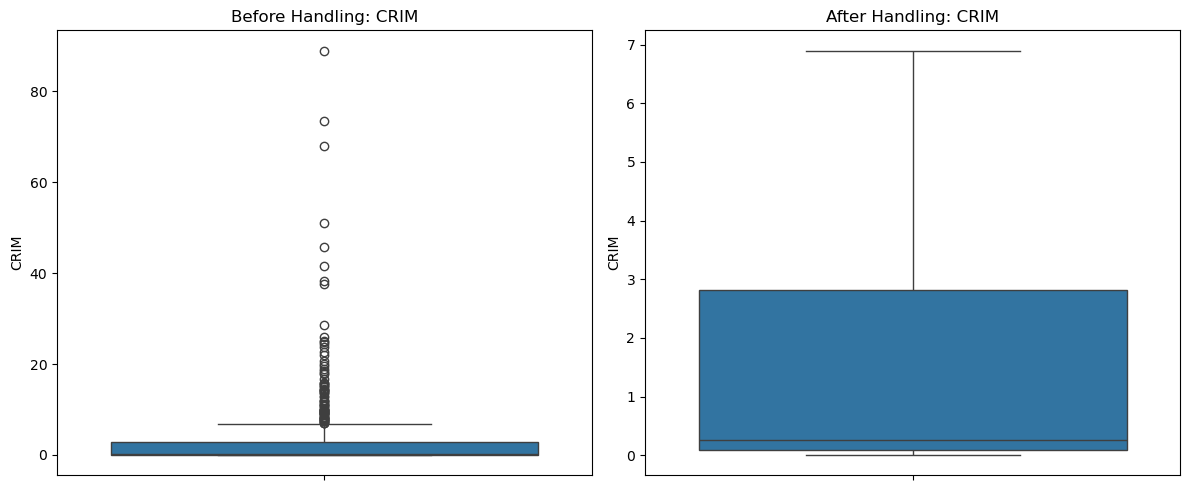

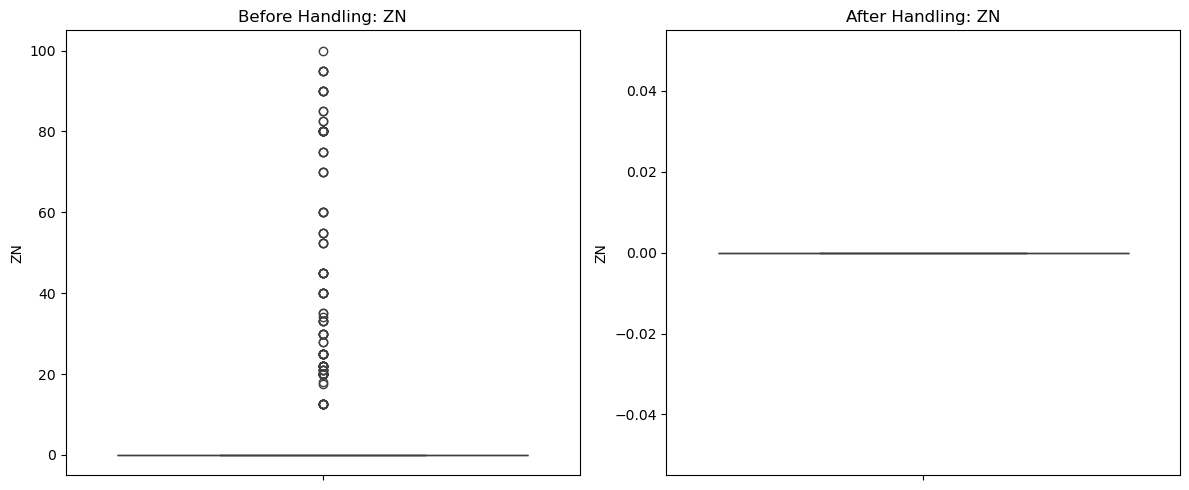

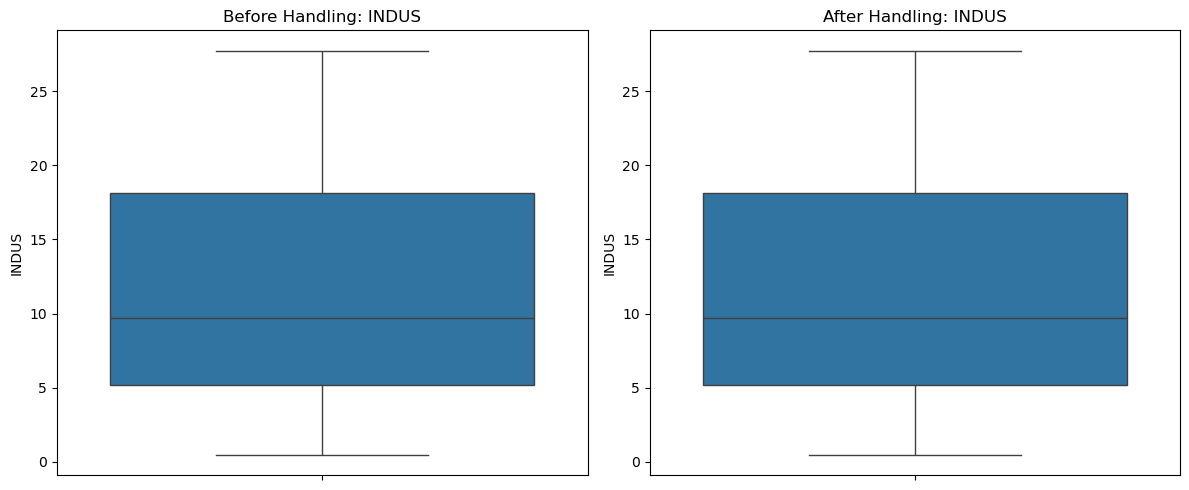

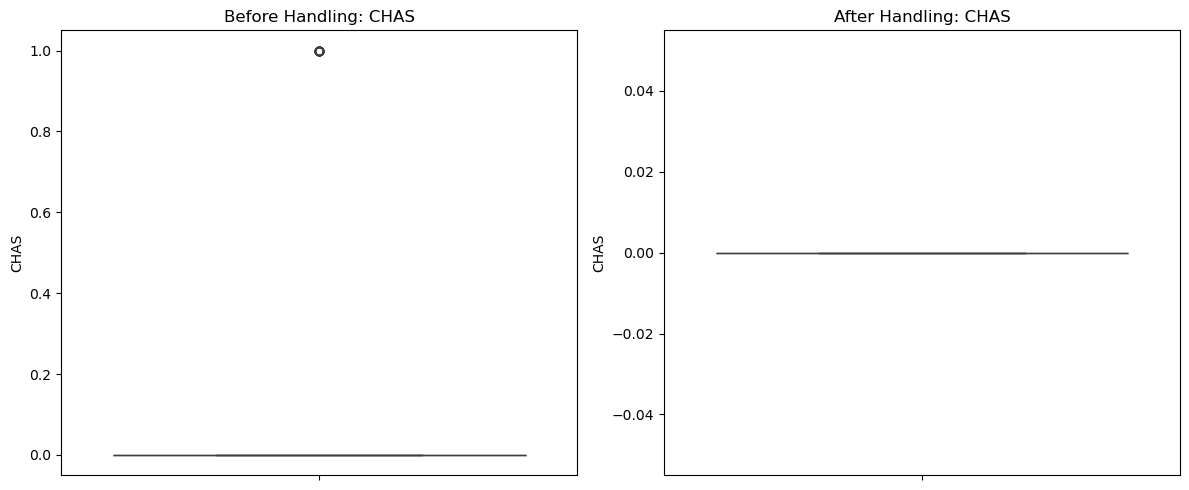

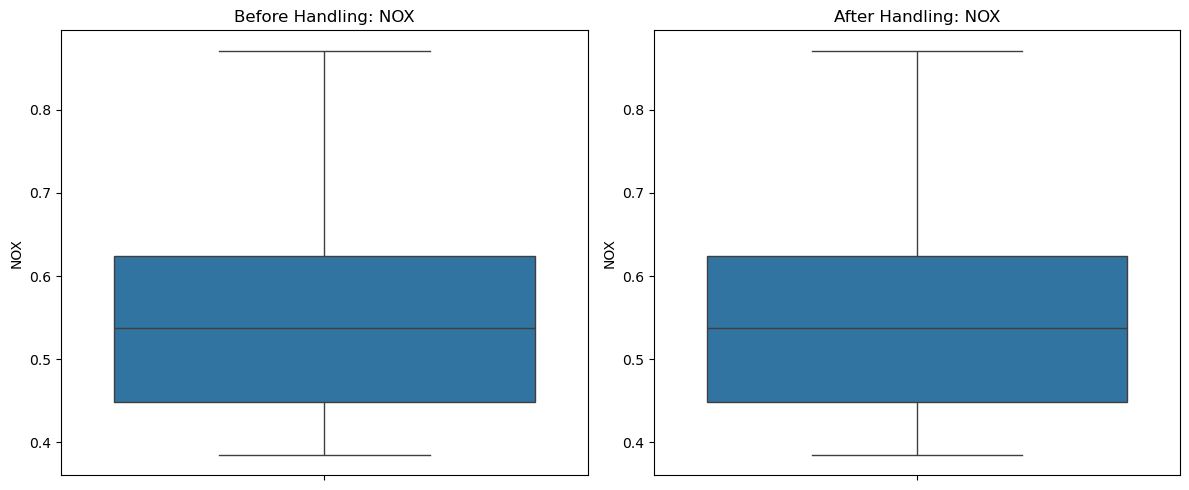

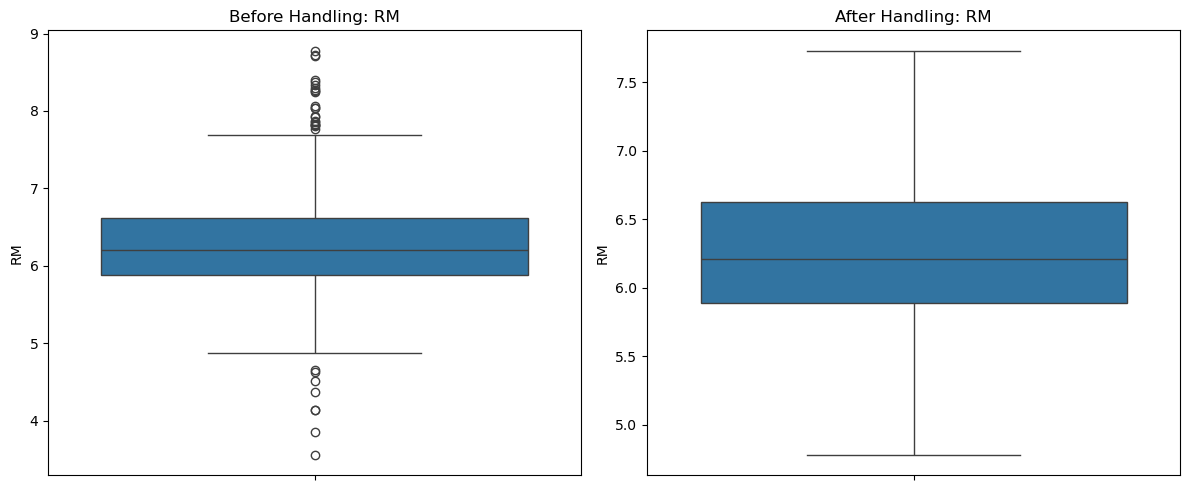

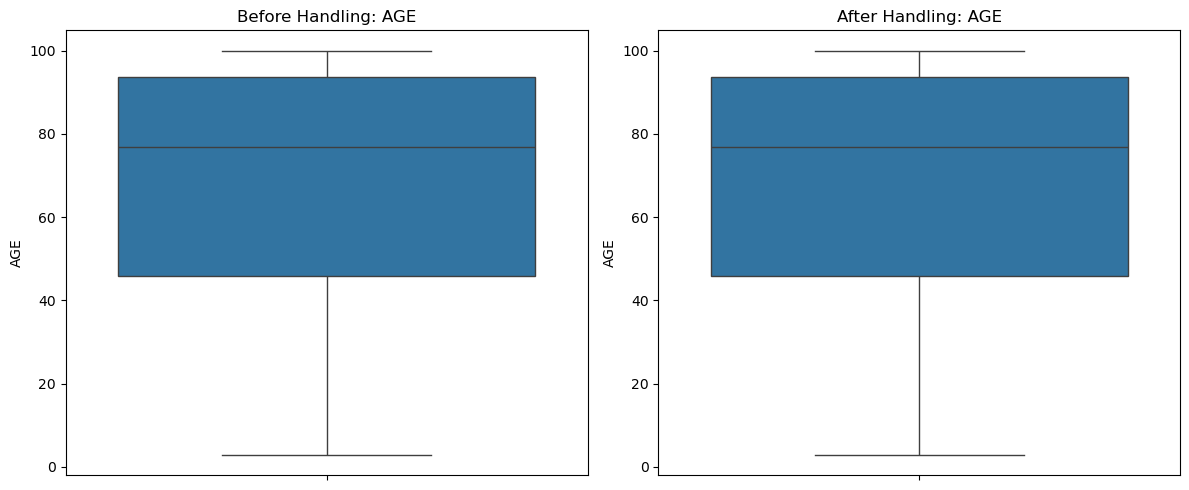

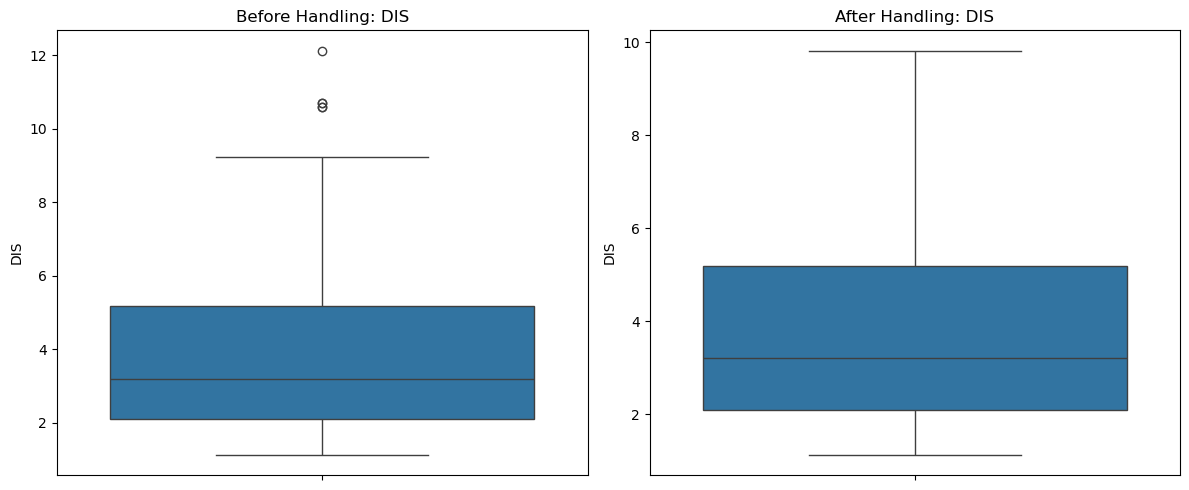

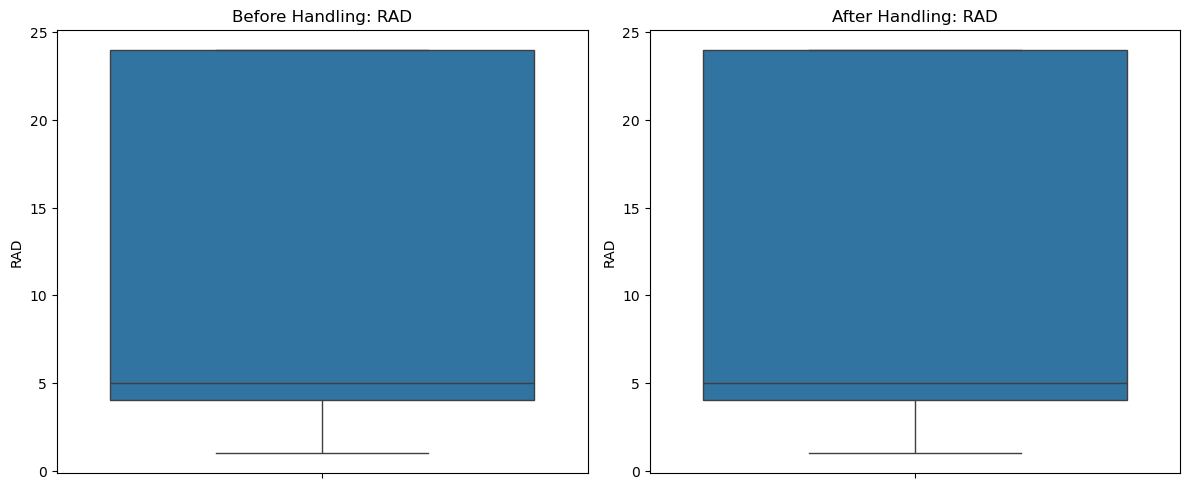

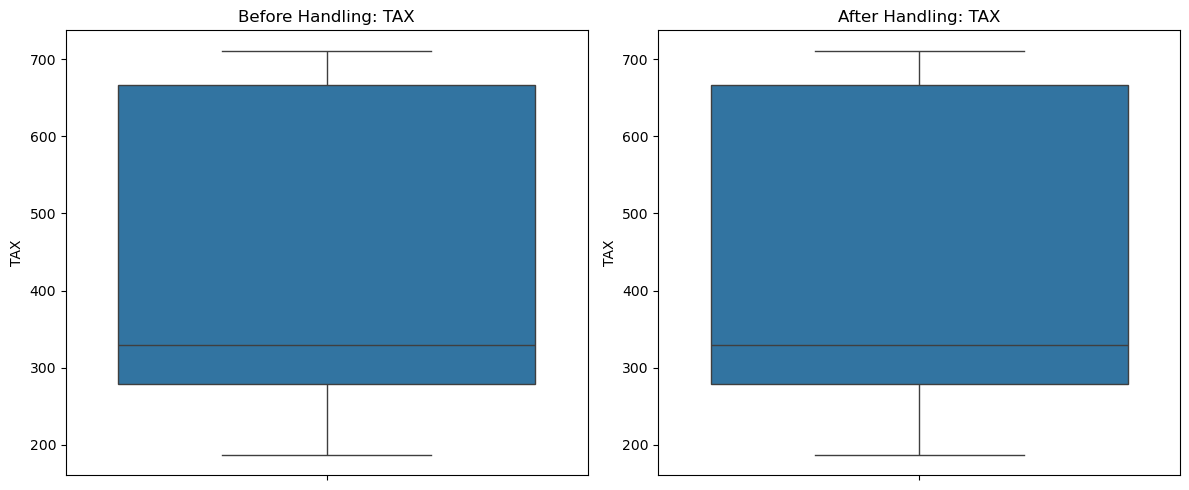

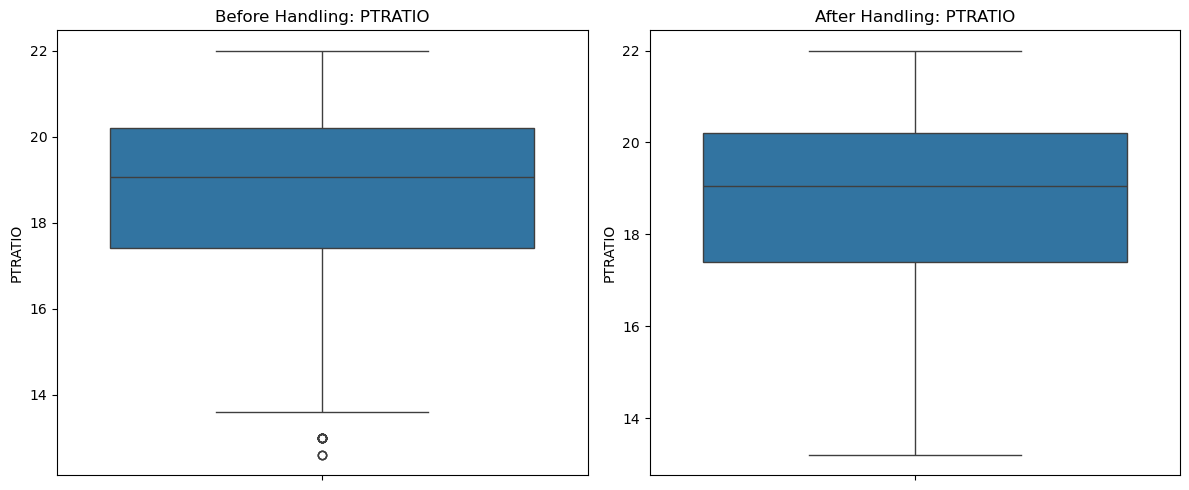

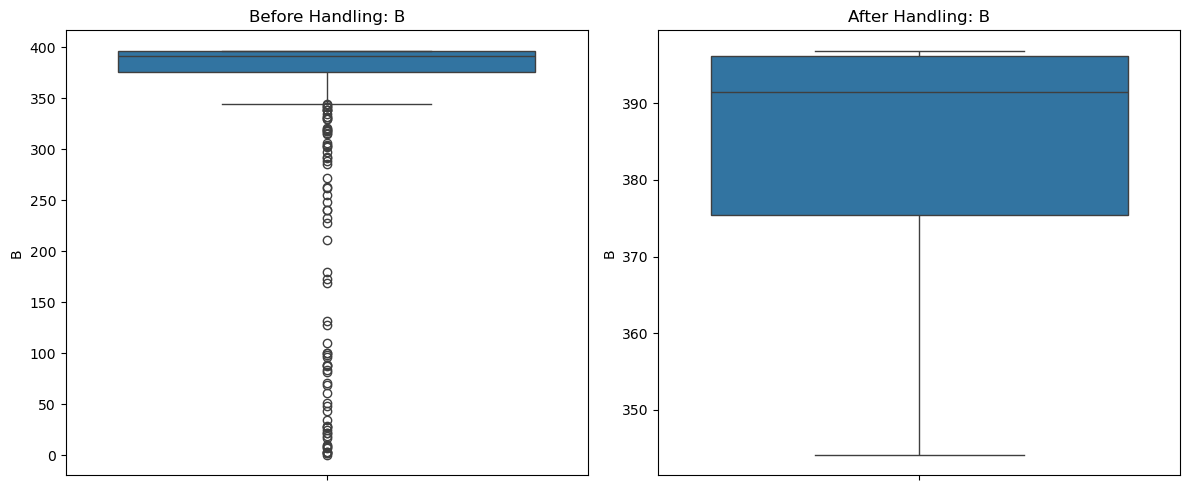

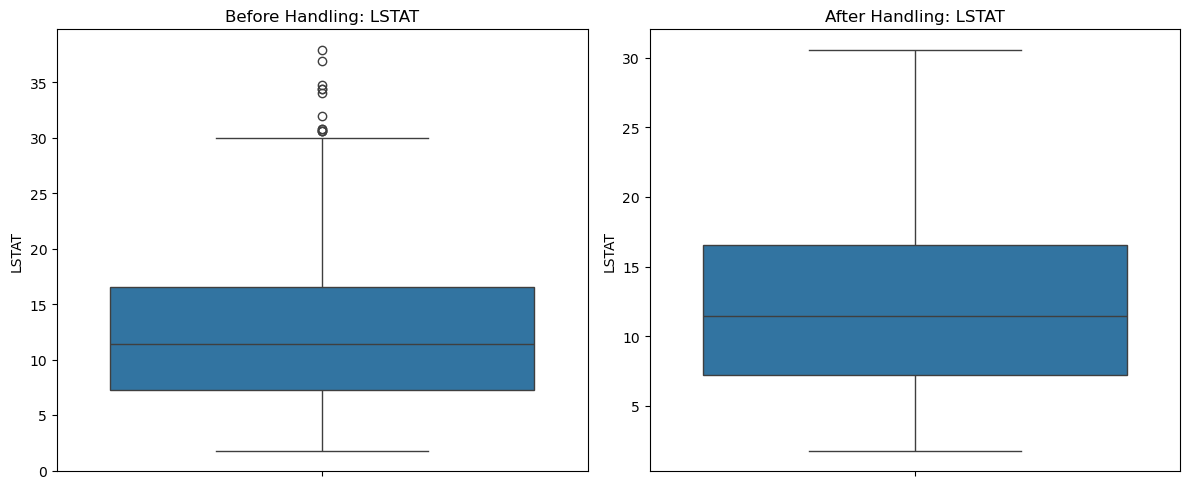

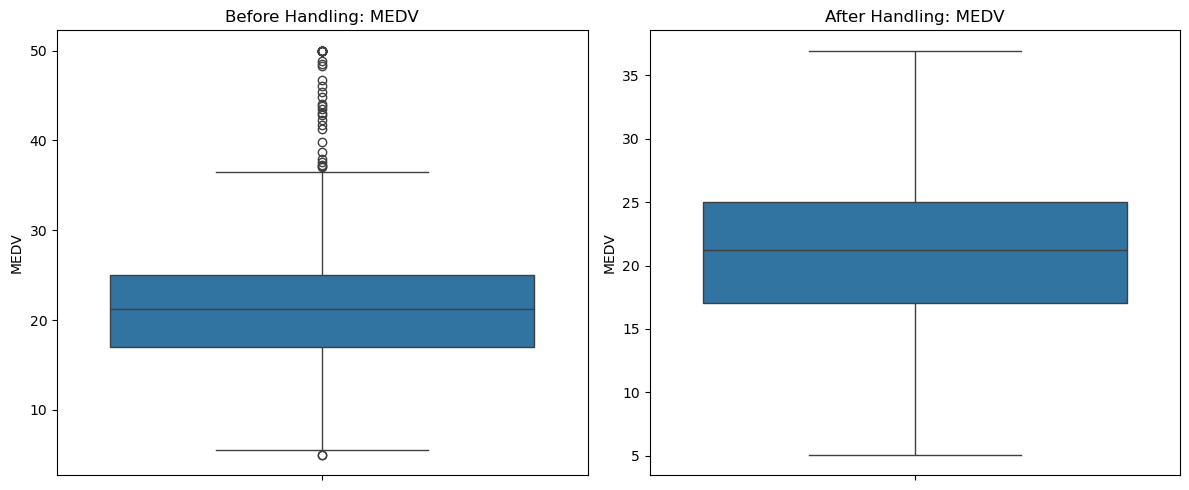

In [3]:
# 이상치 탐색
def calculate_outlier_ratio(df, columns):
    outlier_info = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_ratio = (outlier_count / len(df)) * 100

        outlier_info.append({
            "Column": col,
            "Outlier Count": outlier_count,
            "Outlier Ratio (%)": outlier_ratio
        })
    return pd.DataFrame(outlier_info)

# 이상치 비율 계산
outlier_summary = calculate_outlier_ratio(df_cleaned, numeric_columns)

print("\n이상치 비율 요약:")
print(outlier_summary)

# 이상치 처리 함수
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

df_outliers_handled = handle_outliers(df_cleaned.copy(), numeric_columns)

# 이상치 처리 후 시각화 (박스 플롯)
def plot_boxplots(df_before, df_after, columns):
    for col in columns:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.boxplot(data=df_before[col])
        plt.title(f'Before Handling: {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(data=df_after[col])
        plt.title(f'After Handling: {col}')
        plt.tight_layout()
        plt.show()

plot_boxplots(df_cleaned, df_outliers_handled, numeric_columns)

/var/folders/20/38t9rp3145lbpycm0mc5nxb80000gn/T/ipykernel_1153/445967469.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)
/var/folders/20/38t9rp3145lbpycm0mc5nxb80000gn/T/ipykernel_1153/445967469.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Random Forest (MSE): 6.0654386997549015
Random Forest (R²): 0.8760256536312925
Random Forest (MAE): 1.8503529411764685
XGBoost (MSE): 5.5048939321734505
XGBoost (R²): 0.8874828910400421
XGBoost (MAE): 1.7864222152560365

Model Performance Comparison:
           Model       MSE        R²       MAE
0  Random Forest  6.065439  0.876026  1.850353
1        XGBoost  5.504894  0.887483  1.786422


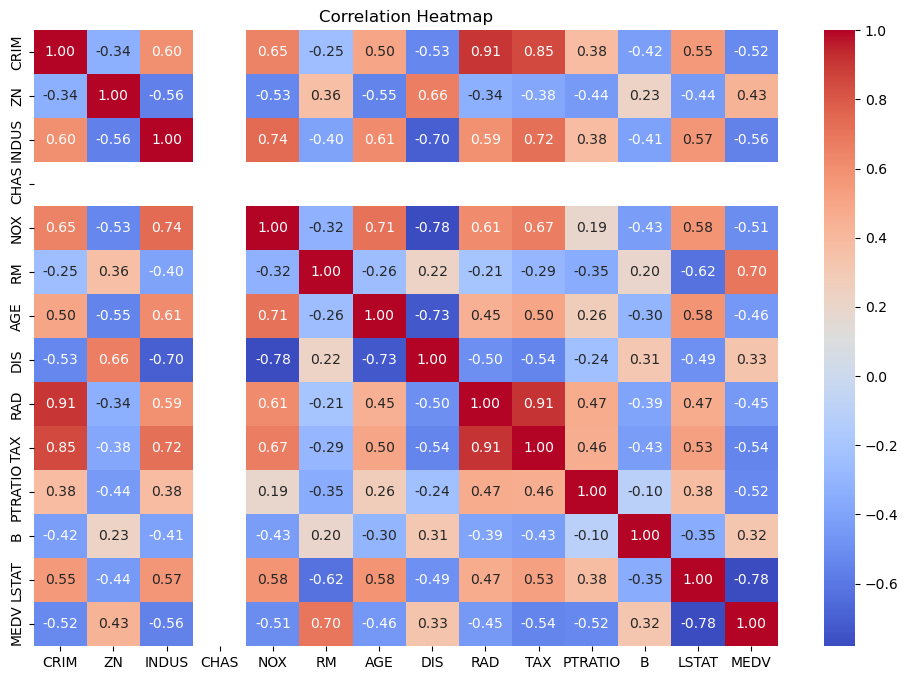

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
file_path = 'housingdata.csv'  # 파일 경로 수정
df = pd.read_csv(file_path)

# 2. 결측치 처리
# 결측치 처리 방식: CHAS(최빈값), 정규성 따른 평균/중앙값
def handle_missing_values(df):
    for column in df.columns:
        if column == 'CHAS':  # 예제에 따라 조정
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
        else:
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
    return df

df_cleaned = handle_missing_values(df)

# 3. 이상치 처리
def handle_outliers(df, threshold=1.5):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

df_cleaned = handle_outliers(df_cleaned)

# 4. 데이터 분리
X = df_cleaned.drop(columns=['MEDV'])  # 'MEDV'는 타겟 변수
y = df_cleaned['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 모델 학습 및 평가 (Random Forest)
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest (MSE): {mse_rf}")
print(f"Random Forest (R²): {r2_rf}")
print(f"Random Forest (MAE): {mae_rf}")

# 7. 모델 학습 및 평가 (XGBoost)
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost (MSE): {mse_xgb}")
print(f"XGBoost (R²): {r2_xgb}")
print(f"XGBoost (MAE): {mae_xgb}")

# 8. 결과 비교
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "MSE": [mse_rf, mse_xgb],
    "R²": [r2_rf, r2_xgb],
    "MAE": [mae_rf, mae_xgb]
})

print("\nModel Performance Comparison:")
print(results)

# 9. 상관계수 히트맵 (Optional)
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# 이상치 처리 함수
def handle_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        z_scores = zscore(df[col])
        abs_z_scores = np.abs(z_scores)
        df = df[abs_z_scores < 3].reset_index(drop=True)  # Z-score 기준으로 이상치 제거
    return df

# 이상치 처리 수행
df_outliers_handled = handle_outliers(df_cleaned)

# 이상치 처리 결과 확인
print("Data after outlier handling:")
print(df_outliers_handled.describe())

Data after outlier handling:
       CRIM   ZN  INDUS  CHAS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO    B  \
count   0.0  0.0    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0  0.0   
mean    NaN  NaN    NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN  NaN   
std     NaN  NaN    NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN  NaN   
min     NaN  NaN    NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN  NaN   
25%     NaN  NaN    NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN  NaN   
50%     NaN  NaN    NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN  NaN   
75%     NaN  NaN    NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN  NaN   
max     NaN  NaN    NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN  NaN   

       LSTAT  MEDV  
count    0.0   0.0  
mean     NaN   NaN  
std      NaN   NaN  
min      NaN   NaN  
25%      NaN   NaN  
50%      NaN   NaN  
75%      NaN   NaN  
max      NaN   NaN  


In [29]:
from scipy.stats import zscore
import numpy as np

# 이상치 처리 함수: Winsorization
def handle_outliers_with_winsorization(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        # IQR 기반 상한선/하한선 계산
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 상한선과 하한선으로 대체
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# 이상치 처리 실행
df_outliers_handled = handle_outliers_with_winsorization(df_cleaned)

# 데이터 확인
print("Data after outlier handling:")
print(df_outliers_handled.describe())

Data after outlier handling:
             CRIM          ZN       INDUS   CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.0  506.000000  506.000000   
mean     2.228077    6.523256   11.083992    0.0    0.554695    6.275312   
std      3.193534   10.810961    6.699165    0.0    0.115878    0.630242   
min      0.006320    0.000000    0.460000    0.0    0.385000    4.778500   
25%      0.083235    0.000000    5.190000    0.0    0.449000    5.885500   
50%      0.290250    0.000000    9.900000    0.0    0.538000    6.208500   
75%      3.611874   11.211934   18.100000    0.0    0.624000    6.623500   
max      8.904832   28.029835   27.740000    0.0    0.871000    7.730500   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.783947    9.549407  408.237154   18.463834  381.918836   
std     27.439466    2.069765    8.707259  

In [31]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X = df_outliers_handled.drop(columns=['MEDV'])
y = df_outliers_handled['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data prepared.")

Training and testing data prepared.


In [33]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


In [67]:
# 3. 이상치 처리
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned = handle_outliers(df_cleaned, numeric_columns)

# 4. 데이터 정규화 (여기에 추가)
scaler = StandardScaler()
X = df_cleaned.drop(columns=['MEDV'])  # MEDV는 타겟 변수
y = df_cleaned['MEDV']
X_scaled = scaler.fit_transform(X)

# 5. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [69]:
import numpy as np

# 정규화 확인: 평균과 표준편차 계산
mean = np.mean(X_scaled, axis=0)  # 평균
std = np.std(X_scaled, axis=0)  # 표준편차

print("Mean of each feature after scaling:", mean)
print("Standard deviation of each feature after scaling:", std)

Mean of each feature after scaling: [ 5.61693862e-17 -1.13655242e-16 -5.61693862e-17  0.00000000e+00
 -1.96592852e-16  2.38719891e-16  5.05524476e-16  1.96592852e-16
 -1.12338772e-16  0.00000000e+00 -6.45947942e-16 -1.16551476e-15
  1.26381119e-16]
Standard deviation of each feature after scaling: [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


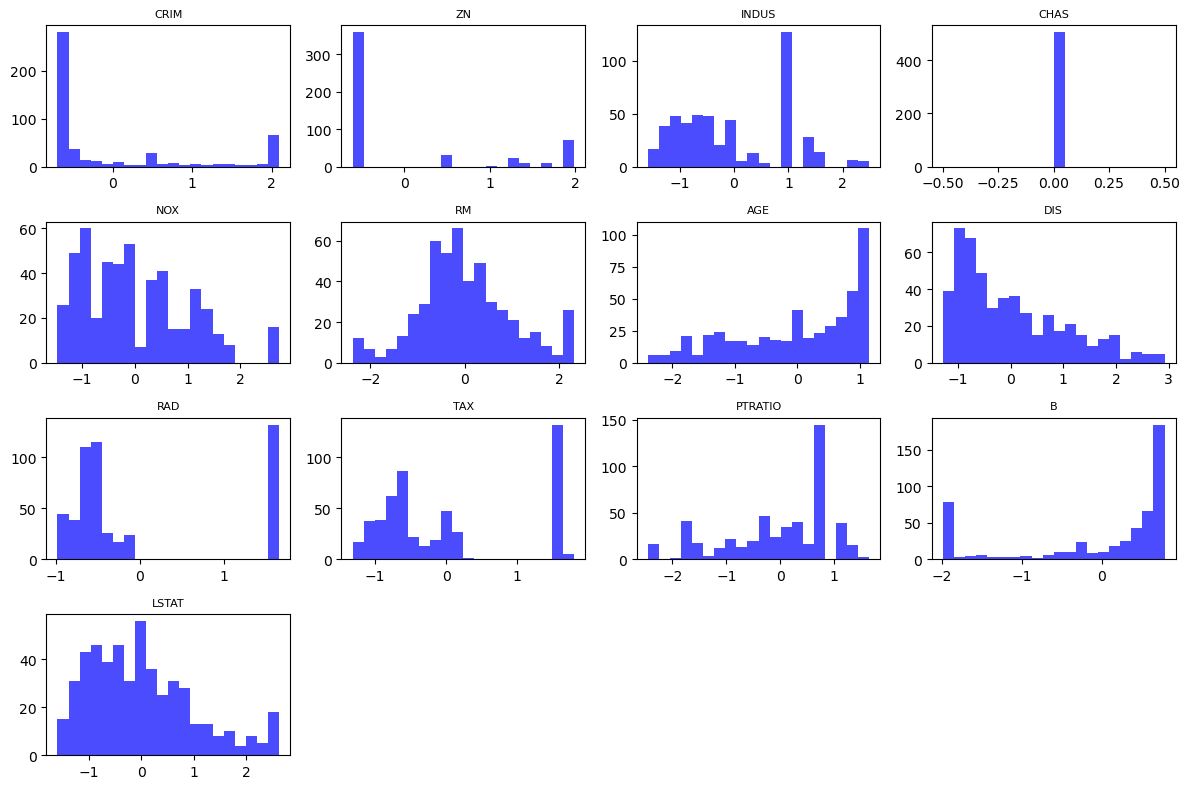

In [71]:
import matplotlib.pyplot as plt

# 정규화된 데이터 히스토그램
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_cleaned.drop(columns=['MEDV']).columns):
    plt.subplot(4, 4, i + 1)
    plt.hist(X_scaled[:, i], bins=20, color='blue', alpha=0.7)
    plt.title(col, fontsize=8)
    plt.tight_layout()
plt.show()

In [75]:
# 정규화 전후 데이터 비교
print("Original Data (First 5 Rows):")
print(X.head())

print("\nScaled Data (First 5 Rows):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Original Data (First 5 Rows):
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B      LSTAT  
0  396.90   4.980000  
1  396.90   9.140000  
2  392.83   4.030000  
3  394.63   2.940000  
4  396.90  12.715432  

Scaled Data (First 5 Rows):
       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.696393  1.062635 -1.311010   0.0 -0.144217  0.475982 -0.121059  0.148015   
1 -0.689814 -0.603990 -0.599771   0.0 -0.740262  0.231390  0.378716  0.572202   
2 -0.689820 -0.603990 -0.599771   0.0 -0.740262  1.444822 -0.270627  0.572202  

In [77]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "MAE": mae, "R²": r2})

results_df = pd.DataFrame(results)

print("\n모델 성능 비교:")
print(results_df)


모델 성능 비교:
               Model        MSE       MAE        R²
0      Random Forest   6.039500  1.845347  0.876556
1            XGBoost   4.633959  1.705814  0.905284
2  Linear Regression  12.530762  2.414846  0.743878
3   Ridge Regression  12.548352  2.413424  0.743518
4   Lasso Regression  13.364379  2.533007  0.726839


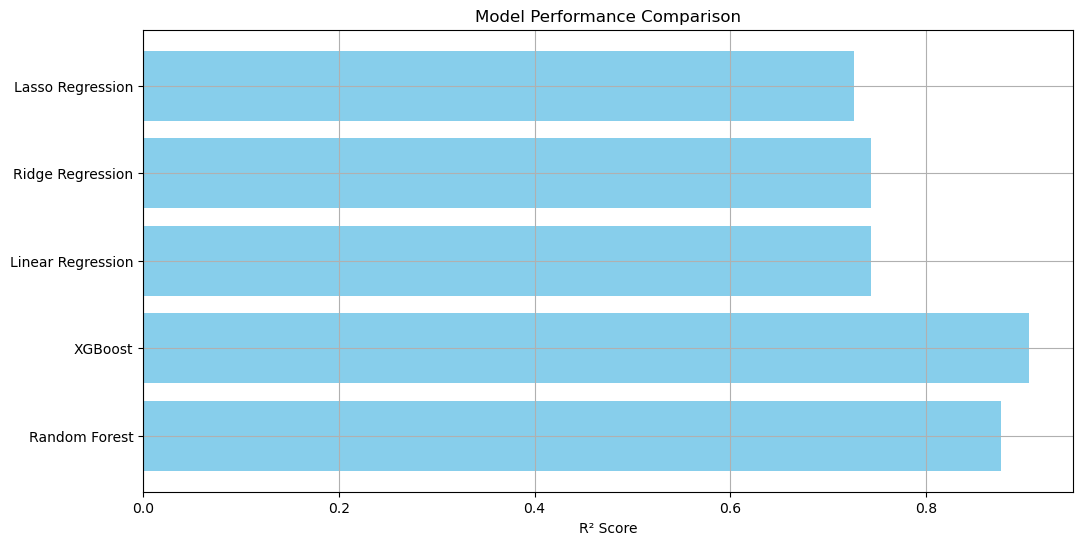

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R²'], color='skyblue')
plt.xlabel('R² Score')
plt.title('Model Performance Comparison')
plt.grid(True)
plt.show()

In [81]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Random Forest 하이퍼파라미터 범위 수정
rf_params_corrected = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [None, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2'],  # 'auto' 제거
    "bootstrap": [True, False]
}

# RandomizedSearchCV 실행
rf_random_corrected = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_params_corrected,
    n_iter=100,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# 모델 학습
rf_random_corrected.fit(X_train, y_train)

# 최적 하이퍼파라미터 및 결과
best_rf_corrected = rf_random_corrected.best_estimator_
y_pred_rf_corrected = best_rf_corrected.predict(X_test)

# 성능 평가
mse_rf_corrected = mean_squared_error(y_test, y_pred_rf_corrected)
r2_rf_corrected = r2_score(y_test, y_pred_rf_corrected)
mae_rf_corrected = mean_absolute_error(y_test, y_pred_rf_corrected)

# 결과 출력
print("Best Hyperparameters for Random Forest (Corrected):", rf_random_corrected.best_params_)
print(f"Random Forest Corrected (MSE): {mse_rf_corrected}")
print(f"Random Forest Corrected (R²): {r2_rf_corrected}")
print(f"Random Forest Corrected (MAE): {mae_rf_corrected}")

Best Hyperparameters for Random Forest (Corrected): {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}
Random Forest Corrected (MSE): 5.2227742460784725
Random Forest Corrected (R²): 0.8932492676226269
Random Forest Corrected (MAE): 1.7284799019607915


In [84]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 직접 하이퍼파라미터 설정
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    random_state=42
)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R²: {r2_xgb}")

XGBoost MSE: 5.43025267700138
XGBoost R²: 0.8890085186624054


In [87]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# 1. 튜닝 전 Random Forest 모델 학습
rf_model_before = RandomForestRegressor(random_state=42)
rf_model_before.fit(X_train, y_train)

# 2. 튜닝 후 Random Forest 모델 학습 (예시 하이퍼파라미터)
rf_model_after = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model_after.fit(X_train, y_train)

# 3. 튜닝 전 XGBoost 모델 학습
xgb_model_before = XGBRegressor(random_state=42)
xgb_model_before.fit(X_train, y_train)

# 4. 튜닝 후 XGBoost 모델 학습 (예시 하이퍼파라미터)
xgb_model_after = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model_after.fit(X_train, y_train)

# 5. 성능 비교
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    return mse, r2, mae

# Random Forest 성능
mse_rf_before, r2_rf_before, mae_rf_before = evaluate_model(rf_model_before, X_test, y_test)
mse_rf_after, r2_rf_after, mae_rf_after = evaluate_model(rf_model_after, X_test, y_test)

# XGBoost 성능
mse_xgb_before, r2_xgb_before, mae_xgb_before = evaluate_model(xgb_model_before, X_test, y_test)
mse_xgb_after, r2_xgb_after, mae_xgb_after = evaluate_model(xgb_model_after, X_test, y_test)

# 비교 데이터프레임 생성
comparison_data = [
    {"Model": "Random Forest (Before Tuning)", "MSE": mse_rf_before, "R²": r2_rf_before, "MAE": mae_rf_before},
    {"Model": "Random Forest (After Tuning)", "MSE": mse_rf_after, "R²": r2_rf_after, "MAE": mae_rf_after},
    {"Model": "XGBoost (Before Tuning)", "MSE": mse_xgb_before, "R²": r2_xgb_before, "MAE": mae_xgb_before},
    {"Model": "XGBoost (After Tuning)", "MSE": mse_xgb_after, "R²": r2_xgb_after, "MAE": mae_xgb_after},
]

comparison_df = pd.DataFrame(comparison_data)

# 결과 출력
print("\nModel Performance Before and After Hyperparameter Tuning:")
print(comparison_df)


Model Performance Before and After Hyperparameter Tuning:
                           Model       MSE        R²       MAE
0  Random Forest (Before Tuning)  6.039500  0.876556  1.845347
1   Random Forest (After Tuning)  6.522274  0.866688  1.921502
2        XGBoost (Before Tuning)  4.633959  0.905284  1.705814
3         XGBoost (After Tuning)  5.265351  0.892379  1.746529


Random Forest Feature Importance:
    Feature  Importance
5        RM    0.447365
12    LSTAT    0.353672
0      CRIM    0.053255
7       DIS    0.036481
4       NOX    0.026735
9       TAX    0.021580
10  PTRATIO    0.020368
6       AGE    0.015758
11        B    0.010991
2     INDUS    0.006858
8       RAD    0.005392
1        ZN    0.001545
3      CHAS    0.000000


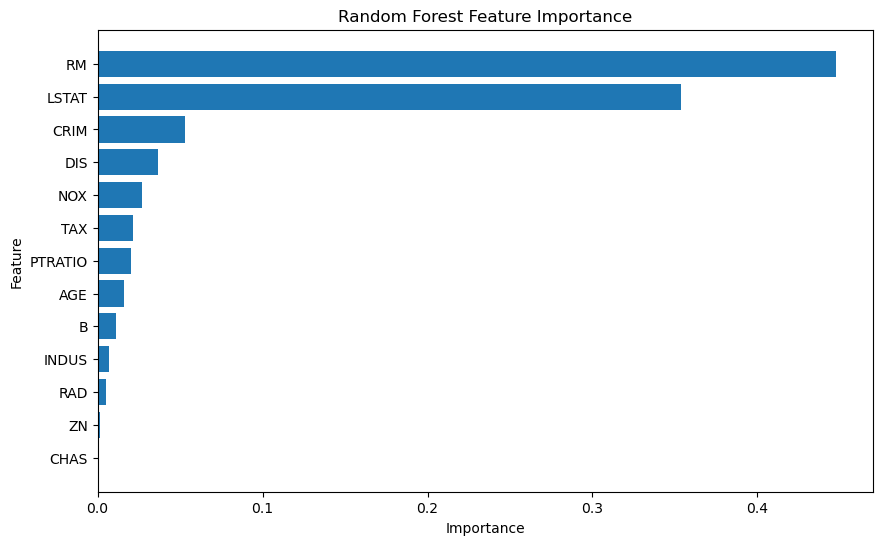

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Random Forest 모델 학습
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# 특성 중요도 추출
feature_importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 출력 및 시각화
print("Random Forest Feature Importance:")
print(feature_importances_rf)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf['Feature'], feature_importances_rf['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

XGBoost Feature Importance:
    Feature  Importance
12    LSTAT    0.308769
5        RM    0.250464
4       NOX    0.106029
10  PTRATIO    0.069792
9       TAX    0.068156
0      CRIM    0.052565
7       DIS    0.041452
8       RAD    0.034242
2     INDUS    0.024178
6       AGE    0.016995
11        B    0.013876
1        ZN    0.013482
3      CHAS    0.000000


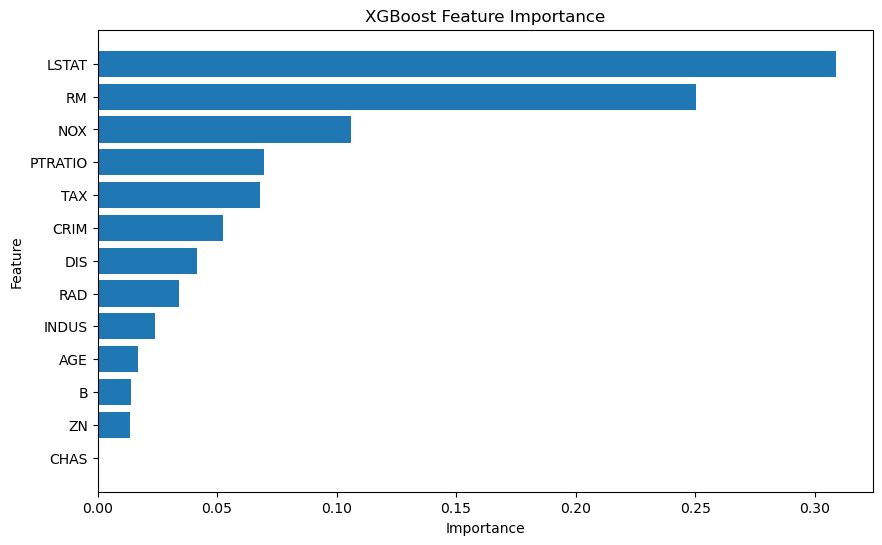

In [91]:
from xgboost import plot_importance

# 특성 중요도 출력
feature_importances_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("XGBoost Feature Importance:")
print(feature_importances_xgb)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_xgb['Feature'], feature_importances_xgb['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

Initial Data Overview:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX     

/var/folders/20/38t9rp3145lbpycm0mc5nxb80000gn/T/ipykernel_1153/556086543.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


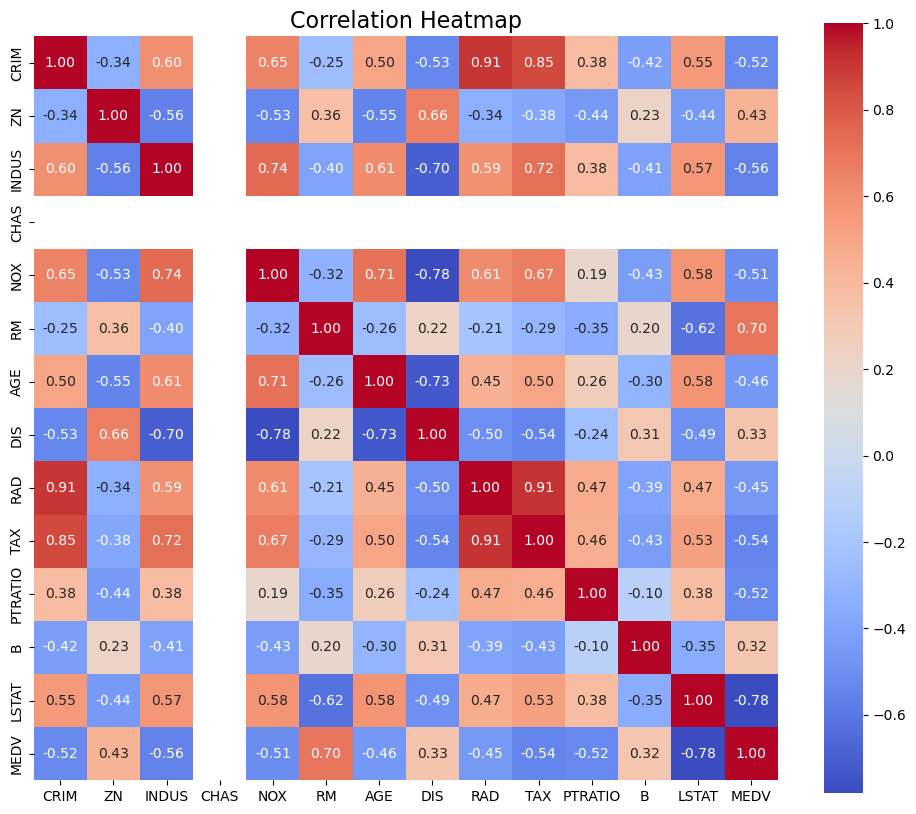


Feature Correlations with Target (MEDV):
MEDV       1.000000
RM         0.697645
ZN         0.432365
DIS        0.333079
B          0.321250
RAD       -0.452679
AGE       -0.455623
NOX       -0.506505
CRIM      -0.519442
PTRATIO   -0.523993
TAX       -0.543545
INDUS     -0.555148
LSTAT     -0.781319
CHAS            NaN
Name: MEDV, dtype: float64


In [93]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import shapiro, probplot
import numpy as np

# 1. 데이터 로드
file_path = "/Users/ohjunho/Downloads/housingdata.csv"  # 파일 경로
df = pd.read_csv(file_path)

# 데이터 확인
print("Initial Data Overview:")
print(df.head())
print(df.info())

# 결측치 처리 함수
def handle_missing_values(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        if df[column].isnull().sum() > 0:
            df[column].fillna(df[column].mean(), inplace=True)
    return df

# 결측치 처리
df_cleaned = handle_missing_values(df)

# 결측치 처리 결과 확인
print("Missing values after processing:")
print(df_cleaned.isnull().sum())

# 이상치 처리 함수
def handle_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# 이상치 처리
df_cleaned = handle_outliers(df_cleaned)

# 상관계수 계산 및 히트맵 생성
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# 타겟 변수(MEDV)와의 상관성 출력
target_correlation = correlation_matrix['MEDV'].sort_values(ascending=False)
print("\nFeature Correlations with Target (MEDV):")
print(target_correlation)

Model Performance Comparison:
           Model       MSE        R²       MAE
0  Random Forest  5.756576  0.882339  1.840954
1        XGBoost  5.504894  0.887483  1.786422


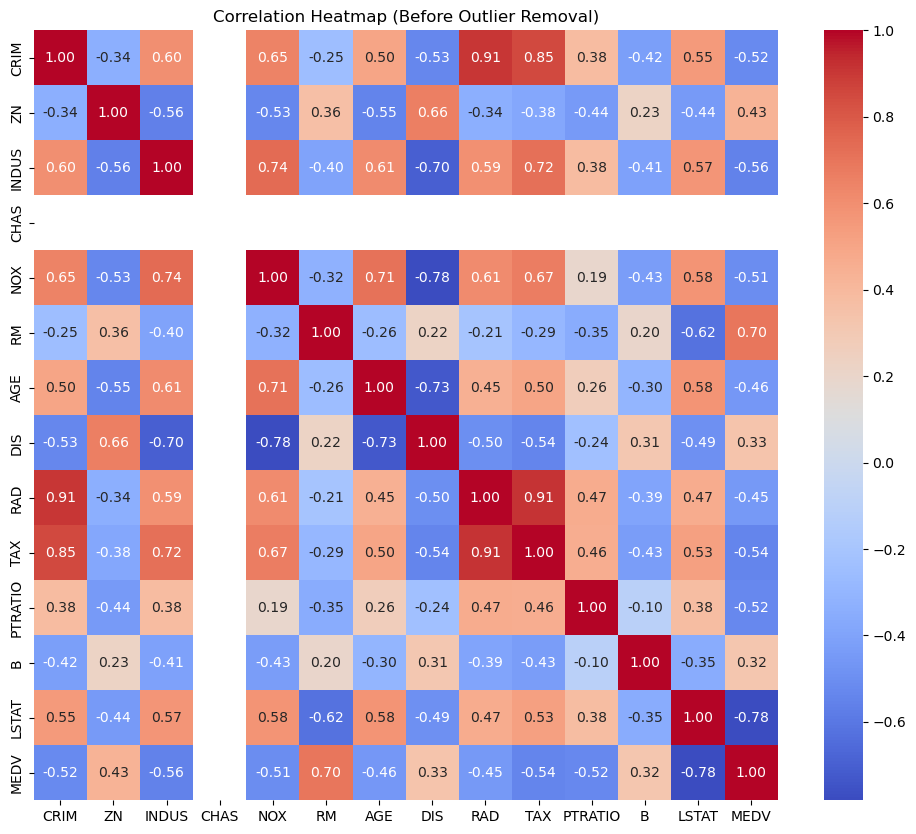

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
file_path = "/Users/ohjunho/Downloads/housingdata.csv"  # 정확한 경로 사용
df = pd.read_csv(file_path)

# 2. 결측치 처리 함수
def handle_missing_values(df):
    for column in df.columns:
        if column == 'CHAS':  # CHAS는 최빈값으로 대체
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
        else:  # 나머지는 평균으로 대체
            mean_value = df[column].mean()
            df[column] = df[column].fillna(mean_value)
    return df

# 결측치 처리
df_cleaned = handle_missing_values(df)

# 3. 이상치 처리 함수
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # 이상치를 클리핑 처리
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned = handle_outliers(df_cleaned, numeric_columns)

# 4. 데이터 정규화
scaler = StandardScaler()
X = df_cleaned.drop(columns=['MEDV'])  # MEDV는 타겟 변수
y = df_cleaned['MEDV']
X_scaled = scaler.fit_transform(X)

# 5. 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Random Forest 모델
rf_model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# 7. XGBoost 모델
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# 8. 결과 비교 데이터프레임 생성
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "MSE": [mse_rf, mse_xgb],
    "R²": [r2_rf, r2_xgb],
    "MAE": [mae_rf, mae_xgb]
})

# 결과 출력
print("Model Performance Comparison:")
print(results)

# 9. 상관계수 히트맵 (이상치 제거 전 데이터)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap (Before Outlier Removal)")
plt.show()